# Esercitazione 2

In questa esercitazione vogliamo utilizzare i metodi montecarlo per calcolare un integrale trigonometrico e approcciare i processi stocastici simulando un random walk in tre dimensioni su un reticolo cubico o nel continuo.

## Esercizio 2.1

Sfruttiamo ancora una volta il generatore di numeri pseudo-casuali per calcolare il seguente integrale: 

$$I = \int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2}x) dx = 1$$

Il calcolo montecarlo di un integrale prevede di campionare l'intervallo di integrazione $[a,b]$ della funzione $f(x)$ estraendo N punti $x_i$ e stimare l'integrale come $$I = (b-a)\frac{1}{N}\sum_{i=1}^{N}f(x_i) $$

Sostanzialmente, quindi, abbiamo fattorizzato f(x) in una funzione, $g(x)$, moltiplicata per una distribuzione di probabilita' $p(x)$ che in questo caso e' la distribuzione uniforme nell'intervallo $[a,b]$.

Siamo sicuri, pero', che questa sia la migliore fattorizzazione possibile? Ossia che $p(x)$ sia la piu' efficiente distribuzione di probabilita' con cui calcolare l'integrale?
Qui ci viene in aiuto il metodo dell'Importance Sampling che afferma che se usassimo $p(x)$ esattamente uguale all'integranda, il risultato di una valutazione montecarlo avrebbe varianza 0!

Sfortunatamente, pero', non sempre sappiamo calcolare l'integrale di $p(x)$, cioe' esattamente la nostra integranda, per poter trovare la funzione cumulativa da usare nel metodo della cumulativa per poi estrarre gli $x_i$. \
L'importance sampling ci suggerisce, quindi, che la miglore scelta per una $p(x)$ e' la distribuzione piu' "simile" possibile alla nostra integranda cosi' da ridurre al minimo l'errore sulla stima dell'integrale. \
Dobbiamo, pero', prestare particolare attenzione nella scelta di $p(x)$ perche' dovra' essere definita positiva e normalizzata ad uno.

Per il calcolo del nostro integrale vogliamo, percio', utilizzare e confrontare questi due metodi.

### 1.Campionamento Uniforme

Usiamo un campionamento uniforme della variabile $x_i$ in $[0,1]$. Sfruttiamo, come nella esercitazione 1, il metodo del data blocking con 100 blocchi e $10^5$ lanci totali.
Costruiamo, quindi, un plot con la stima del nostro integrale, che deve convergere al valore atteso pari ad 1, come funzione del numero di blocchi.

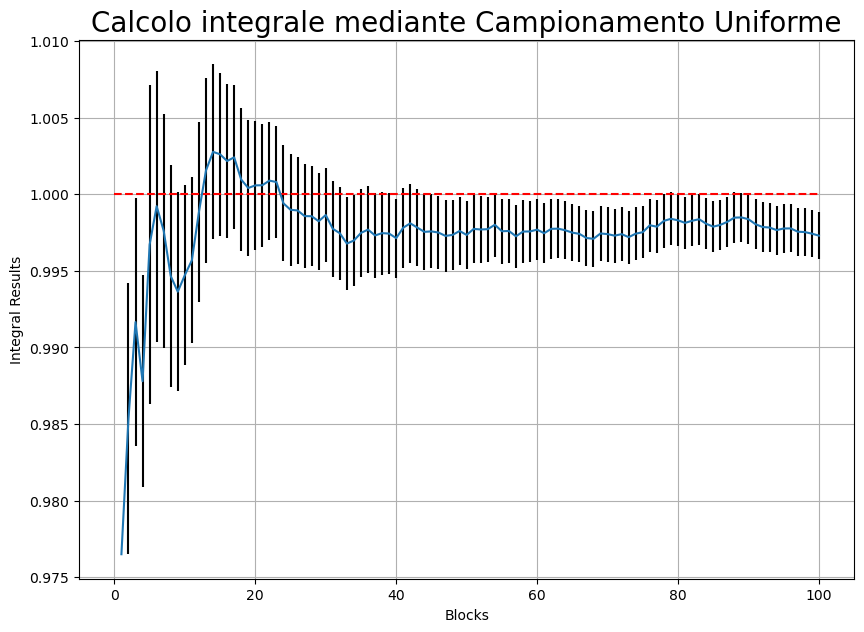

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N =100
x = np.arange(N)+1    
average, error = np.loadtxt("es2.1/uniform_results.out", usecols=(0, 1), unpack=True, delimiter=' ')
plt.figure(figsize=(10,7))
plt.errorbar(x,average,yerr=error, ecolor='black')
plt.title('Calcolo integrale mediante Campionamento Uniforme', fontsize=20)
plt.grid(True)
plt.hlines(1, 0, 100, colors='r', linestyles='dashed')
plt.xlabel('Blocks', fontsize=10)
plt.ylabel('Integral Results', fontsize=10)

plt.show()

   
Riportiamo la migliore approssimazione dell'integrale da noi trovata e il suo errore.


In [3]:
print ('La migliore approssimazione dell`integrale calcolato attraverso il camponamento uniforme e` ' 
       + str(average[99]) + ' +- ' + str(error[99]))

La migliore approssimazione dell`integrale calcolato attraverso il camponamento uniforme e` 0.997298 +- 0.0015241


Possiamo quindi vedere come il valore analitico disti da quello da noi trovato di circa una sigma e mezzo.

### 2. Importance Sampling

Vogliamo ora scegliere una distribuzone di probabilita' $p(x)$ piu' efficiente per campionare la nostra variabile.
Osserviamo innanzitutto l'andamento della funzione integranda nell'intervallo $[0,1]$

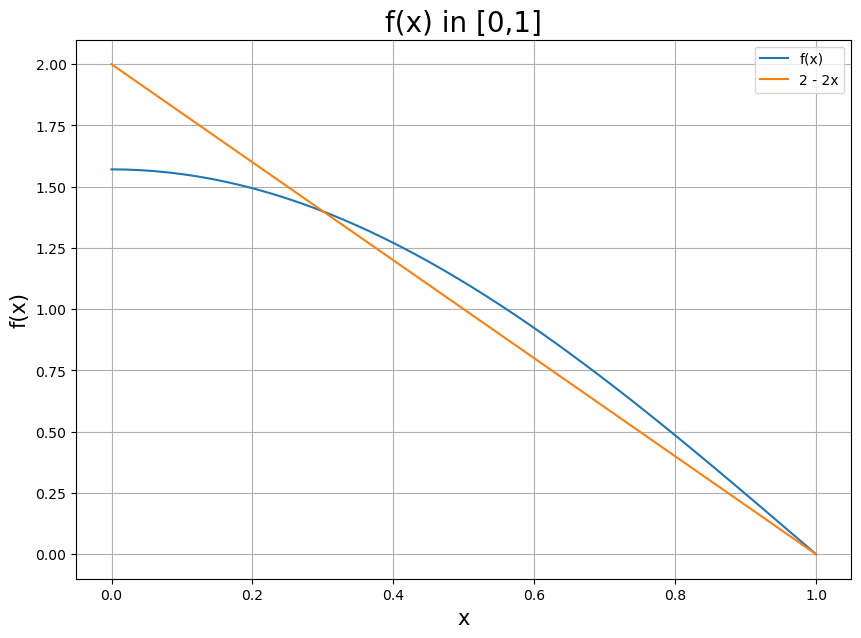

In [4]:
x = np.linspace(0,1)
plt.figure(figsize=(10,7))
plt.plot(x, (math.pi/2)*np.cos(x*(math.pi/2)), mfc = 'blue', label = 'f(x)')
plt.plot(x, 2- 2*x, mfc = 'red', label = '2 - 2x')
plt.title('f(x) in [0,1]', fontsize=20)
plt.grid(True)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)
plt.legend()

plt.show()

Si puo' quindi notare come una buona p(x) sia proprio la distribuzione lineare $p(x)= 2-2x$ che riportiamo anch'essa nel grafico soprastante. \
Possiamo quindi utilizzare il metodo dell'inverso della cumulativa calcolando $F(x)$ come l'integrale di $p(x)$, che porta ad avere $F(x)=2x-x^2$, che poi eguagliamo con una nuova variabile y e invertiamo rispetto x. Tutto cio' porta a trovare che possiamo campionare $p(x)$ generando y uniformemente distribuiti in $[0,1)$ e calcolando $x=1+\sqrt{1-y}$. \
Implementiamo, percio', questa distribuzione nel file $random$.

Ancora una volta utilizziamo il metodo a blocchi e riportiamo il plot del risultato dell'intergrale vs il numero di blocchi.

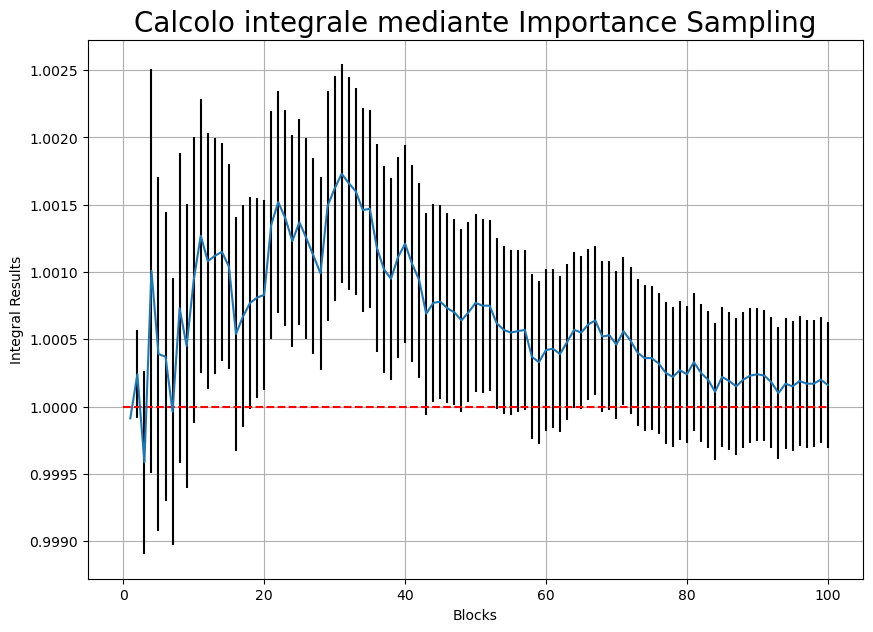

In [6]:
x = np.arange(N)+1    
average_impsampl, error_impsampl = np.loadtxt("es2.1/impsampl_results.out", usecols=(0, 1), unpack=True, delimiter=' ')
plt.figure(figsize=(10,7))
plt.errorbar(x,average_impsampl,yerr=error_impsampl, ecolor='black')
plt.title('Calcolo integrale mediante Importance Sampling', fontsize=20)
plt.grid(True)
plt.hlines(1, 0, 100, colors='r', linestyles='dashed')
plt.xlabel('Blocks', fontsize=10)
plt.ylabel('Integral Results', fontsize=10)

plt.show()

Anche qui possiamo riportare la migliore stima dell'intgrale mediante i campionamento di questa distribuzione di probabilta' non uniforme suggeritaci dal metodo dell'Importance Sampling. 

In [56]:
print ('La migliore approssimazione dell`integrale calcolato attraverso il camponamento uniforme e` ' 
       + str(average_impsampl[99]) + '+-' + str(error_impsampl[99]))

La migliore approssimazione dell`integrale calcolato attraverso il camponamento uniforme e` 1.00016+-0.000465019


Possiamo quindi vedere come il valore analitico disti da quello da noi trovato di circa mezza sigma!
Notiamo quindi come l'importance sampling ci suggerisce una distribuzione che abbassa di molto l'errore sul calcolo integrale. \
Possiamo anche visualizzarlo confrontando i due plot.

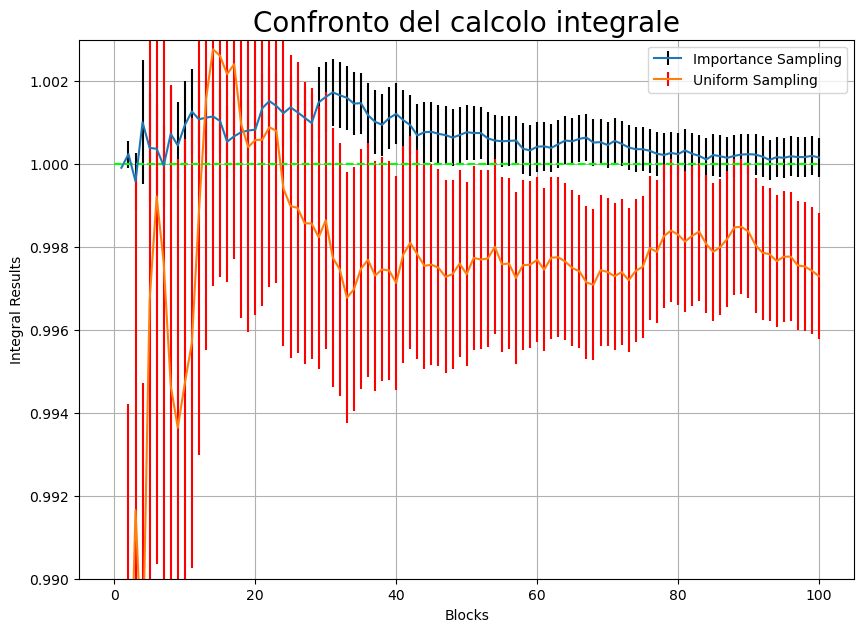

In [57]:
plt.figure(figsize=(10,7))
plt.errorbar(x,average_impsampl,yerr=error_impsampl, ecolor='black', label= 'Importance Sampling')
plt.errorbar(x,average,yerr=error, ecolor='red', label ='Uniform Sampling')
plt.title('Confronto del calcolo integrale', fontsize=20)
plt.grid(True)
plt.hlines(1, 0, 100, colors='lime', linestyles='dashed')
plt.xlabel('Blocks', fontsize=10)
plt.ylabel('Integral Results', fontsize=10)
plt.legend()
plt.ylim(0.990,1.003)

plt.show()

Osserviamo, dunque, come non solo il metodo dell'importance sampling stimi in maniera migliore il risultato dell'integrale, ma lo fa in maniera piu' veloce, quindi necessita' di un minore numero di estrazioni totali, e con fluttuazioni minori del campionamento uniforme: e', senza ombra di dubbio, numericamente piu' efficiente!

## Esercizio 2.2

Vogliamo ora approcciare i processi stocastici simulando un Random Walk in tre dimensioni su un reticolo cubico e nel continuo. \
Costruiamo $10^4$ random walks ognuna che parte dell'origine del sistema di riferimento e costituita da 100 step.
Vogliamo studiare l'andamento della distanza media dall'origine $\sqrt{\langle |\vec r|^2 \rangle}$ in funzione del numero di step compiuti dal nostro random walker: implementiamo, allora, il metodo a blocchi raggruppando le random walks in $N=100$ blocchi; in ogni blocco avremo percio' $100$  random walks e calcoleremo la media di $\sqrt{\langle |\vec r|^2 \rangle}$ su tutti i blocchi dopo ogni numero di passi: avremo quindi una media su tutti i blocchi dopo 1 passo, dopo 2 passi e cosi' via. 

Specifichiamo ora i due casi in cui vogliamo simulare le nostre Random Walks. 

### 1. Random walks 3D su un reticolo cubico discreto

Simuliamo come descritto precedentemente $10^4$ random walks su un reticolo cubico con passo reticolare $a=1$. \
Ad ogni tempo discreto il nostro walker potra' spostarsi in una direzione casuale dello spazio, $x$ $y$ o $z$, simulata da un numero randomicamente estratto in $[0, 2]$ e approssimato all'intero piu' vicino, muovendosi avanti o indietro di $a$, simulato allo stesso modo da una variabile estratta in $[0,1]$: il generatore di numeri casuali uniforme esclude, pero', l'estremo destro quindi formalmente estraiamo in $[0, 3)$ nel primo caso e in $[0,2)$ nel secondo e poi approssimiamo all'intero piu' vicino. \
Calcoliamo poi $\sqrt{\langle |\vec r|^2 \rangle}$ attraverso il metodo a blocchi come sopra descritto. \
Studiamo, dunque, l'andamento della distanza media dall'origine in funzione degli step. Effettuiamo anche un fit con la funzione $f(step)=k*\sqrt{step}$ per verificare che sia compatibile con un processo diffusivo.

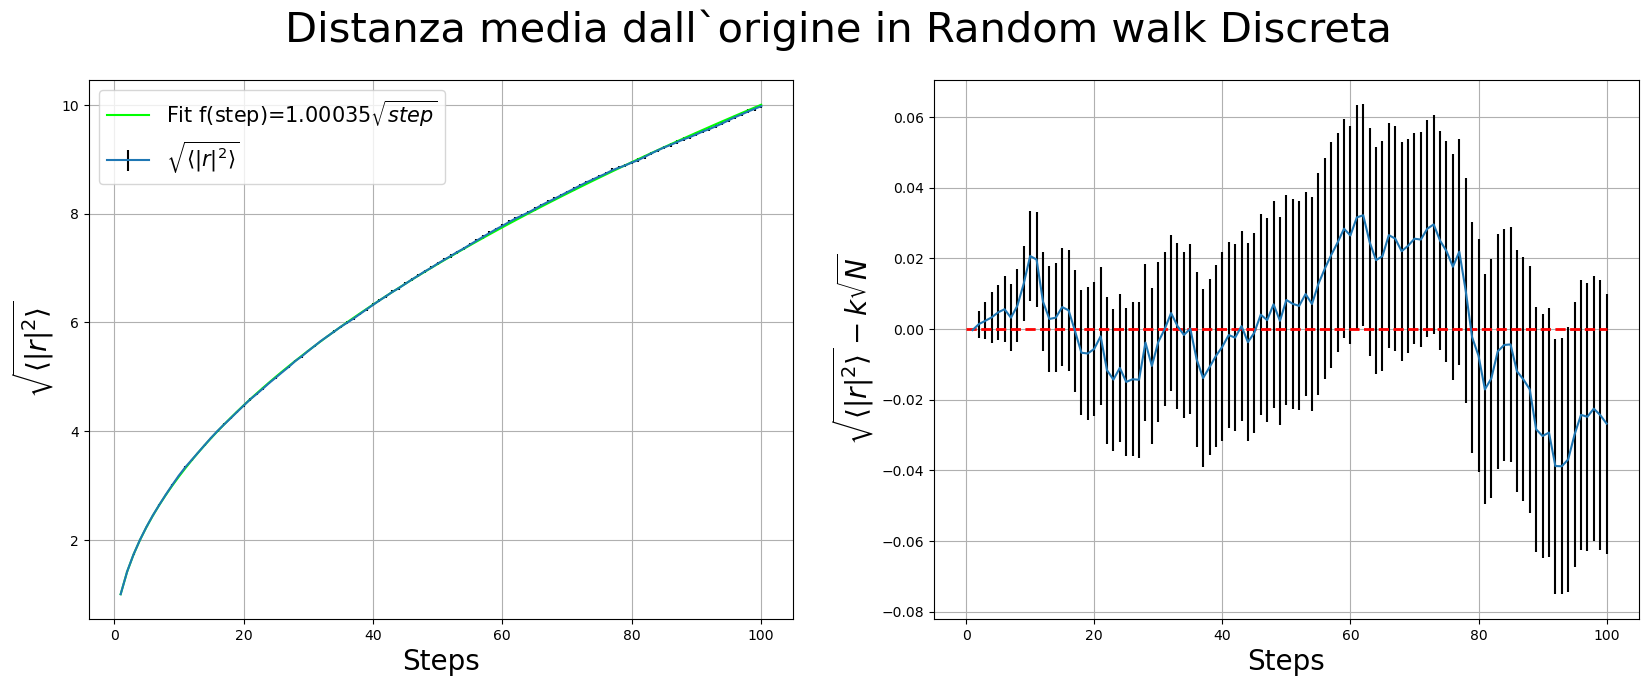

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math

N =100
x = np.arange(N)+1  
plt.figure(figsize=(20,7))

plt.subplot(1, 2, 1)
mean_distance_discrete, error_discrete = np.loadtxt("es2.2/discrete_results.out", usecols=(0, 1),
                                                    unpack=True, delimiter=' ')
plt.errorbar(x,mean_distance_discrete,yerr=error_discrete, ecolor='black', label=r'$\sqrt{\langle |r|^2 \rangle}$')

#fit con f(N) = k*sqrt(N) con N gli step
def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

popt, pcov = curve_fit(f, x, mean_distance_discrete)
plt.plot(x, f(x, *popt),color ='lime', label='Fit f(step)=' + str(round(*popt, 5)) + r'$\sqrt{step}$' )
plt.legend(fontsize = "15")
plt.grid(True)
plt.xlabel('Steps', fontsize=20)
plt.ylabel(r'$\sqrt{\langle |r|^2 \rangle}$', fontsize=20) #r serve per le mathematical expressions


plt.subplot(1,2,2)
plt.errorbar(x, mean_distance_discrete-f(x,*popt), yerr = error_discrete, ecolor='black')
plt.hlines(0, 0, 100, colors='red', linestyles='dashed', linewidth = 2)
plt.xlabel('Steps', fontsize = 20)
plt.ylabel(r'$\sqrt{\langle |r|^2 \rangle} - k\sqrt{N}$', fontsize = 20)


plt.suptitle('Distanza media dall`origine in Random walk Discreta', fontsize=30)
plt.grid(True)

plt.show()

### 2. Random walks 3D nello Spazio Continuo

Simuliamo ora una Random Walks nel continuo. Ad ogni tempo discreto il nostro walker si muove di uno step lungo $a$ in una qualsiasi direzione dello spazio 3D. La direzione di spostamento e' ottenuta studiando il sistema in coordinate sferiche: campioniamo uniformemente l'angolo solido estraendo i due angoli $\theta \in [0,\pi]$ e $\phi \in [0,2\pi]$ col il generatore di numeri pseudocasuali e poi calcoliamo x, y e z applicando la trasformazione da coordinate polari a cartesiane.
Studiamo poi $\sqrt{\langle |\vec r|^2 \rangle}$ in funzione degli step e verifichiamo la compatibilita' con una legge diffusiva fittando la stessa $f(step)$ del punto recedente.

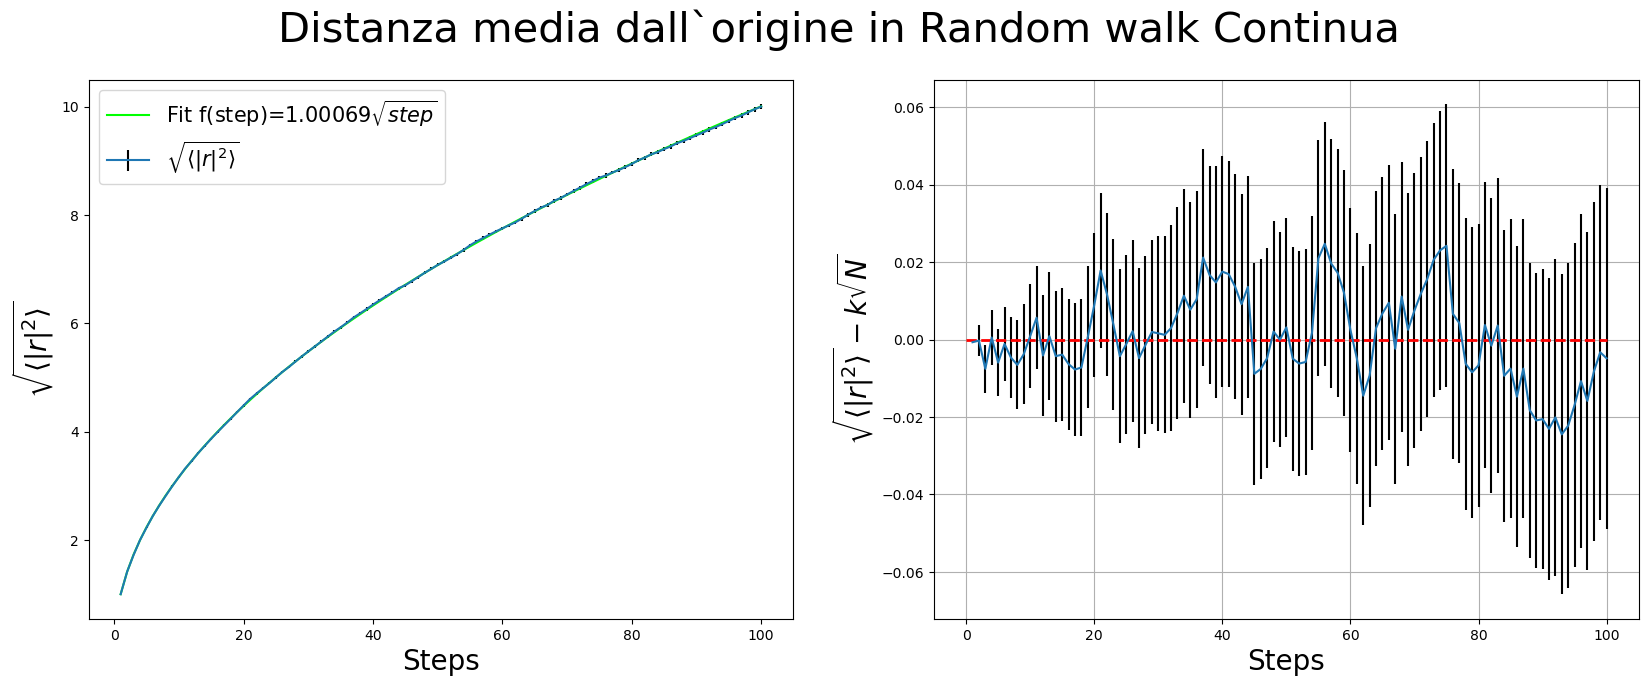

In [15]:
plt.figure(figsize=(20,7))
plt.suptitle('Distanza media dall`origine in Random walk Continua', fontsize=30)

mean_distance_continous, error_continous = np.loadtxt("es2.2/continuos_results.out", usecols=(0, 1),
                                                    unpack=True, delimiter=' ')
plt.subplot(1, 2, 1)
plt.errorbar(x,mean_distance_continous,yerr=error_continous, ecolor='black', label=r'$\sqrt{\langle |r|^2 \rangle}$')

#Fit
popt, pcov = curve_fit(f, x, mean_distance_continous)
plt.plot(x, f(x, *popt),color ='lime', label='Fit f(step)=' + str(round(*popt, 5)) + r'$\sqrt{step}$' )
plt.legend(fontsize = "15")
plt.xlabel('Steps', fontsize=20)
plt.ylabel(r'$\sqrt{\langle |r|^2 \rangle}$', fontsize=20)


plt.subplot(1,2,2)
plt.errorbar(x, mean_distance_continous-f(x,*popt), yerr = error_continous, ecolor='black')
plt.hlines(0, 0, 100, colors='red', linestyles='dashed', linewidth = 2)
plt.xlabel('Steps', fontsize = 20)
plt.ylabel(r'$\sqrt{\langle |r|^2 \rangle} - k\sqrt{N}$', fontsize = 20)

plt.grid(True)
plt.show()

Possiamo, quindi, osservare come entrambi gli andamenti siano compatibili col fit $\propto \sqrt{steps}$ con parametro di proporzionalita' $k \simeq 1 $ e possiamo quindi affermare di aver verificato che in entrambi i casi siamo di fronte a processi diffusivi.